In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
sb.set_style('ticks')

In [137]:
data = pd.read_csv('dataset_credit_scoring.csv')

In [3]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

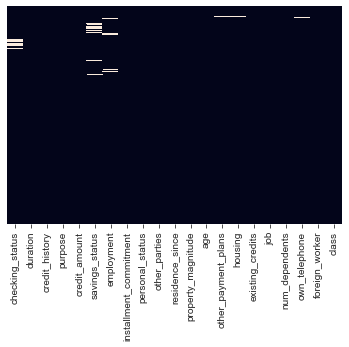

In [4]:
sb.heatmap(data.isnull(), cbar= False, yticklabels= False)

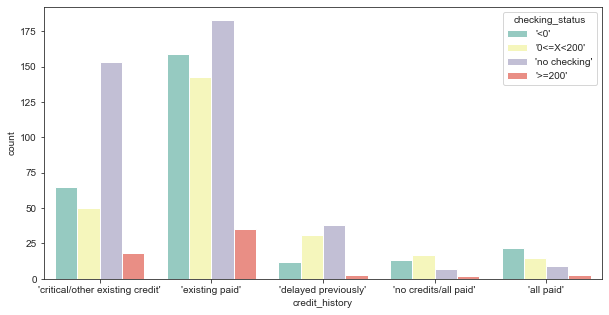

In [5]:
plt.figure(figsize= (10,5))
sb.countplot(data['credit_history'], hue = data['checking_status'])

In [6]:
data['checking_status'].value_counts()

'no checking'    390
'<0'             271
'0<=X<200'       256
'>=200'           62
Name: checking_status, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lbl = LabelEncoder()

In [138]:
data['checking_status'] = pd.get_dummies(data['checking_status'], drop_first= True)

In [139]:
data['other_parties'].value_counts()

none              905
guarantor          52
'co applicant'     41
Name: other_parties, dtype: int64

In [140]:
data['other_parties'] = pd.get_dummies(data['other_parties'], drop_first= True)

In [141]:
data['credit_history'] = pd.get_dummies(data['credit_history'], drop_first= True)

In [142]:
data['purpose'] = pd.get_dummies(data['purpose'])

In [143]:
data['savings_status'] = pd.get_dummies(data['savings_status'], drop_first= True)

In [144]:
data['savings_status'].value_counts()

0    939
1     61
Name: savings_status, dtype: int64

In [145]:
data['employment'] = pd.get_dummies(data['employment'], drop_first= True)

In [146]:
data['personal_status'] = pd.get_dummies(data['personal_status'], drop_first= True)

In [147]:
data['property_magnitude'] = pd.get_dummies(data['property_magnitude'], drop_first= True)

In [148]:
data['other_payment_plans'] = pd.get_dummies(data['other_payment_plans'], drop_first= True)

In [149]:
data['housing'] = pd.get_dummies(data['housing'], drop_first= True)

In [150]:
data['job'] = pd.get_dummies(data['job'], drop_first=True)

In [151]:
data['own_telephone'] = pd.get_dummies(data['own_telephone'], drop_first= True)

In [152]:
data['foreign_worker'] = pd.get_dummies(data['foreign_worker'], drop_first= True)

In [153]:
data['class'] = pd.get_dummies(data['class'], drop_first=  True)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   uint8  
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   uint8  
 3   purpose                 1000 non-null   uint8  
 4   credit_amount           1000 non-null   int64  
 5   savings_status          1000 non-null   uint8  
 6   employment              1000 non-null   uint8  
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   uint8  
 9   other_parties           1000 non-null   uint8  
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   uint8  
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   uint8  
 14  housing                 1000 non-null   u

In [163]:
data['existing_credits'].fillna(value = 1.4074074074074074,inplace = True)

In [164]:
data['existing_credits'].value_counts()

1.000000    632
2.000000    333
3.000000     28
4.000000      6
1.407407      1
Name: existing_credits, dtype: int64

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   uint8  
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   uint8  
 3   purpose                 1000 non-null   uint8  
 4   credit_amount           1000 non-null   int64  
 5   savings_status          1000 non-null   uint8  
 6   employment              1000 non-null   uint8  
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   uint8  
 9   other_parties           1000 non-null   uint8  
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   uint8  
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   uint8  
 14  housing                 1000 non-null   u

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scale = StandardScaler()

In [178]:
scaled = scale.fit_transform(data.drop('checking_status', axis = 1))

In [179]:
new_df = pd.DataFrame(scaled, columns= data.columns.drop('checking_status'))

In [180]:
new_df

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,-1.236478,1.553374,-0.110208,-0.745131,-0.254878,-0.457373,0.918477,-0.229416,-0.234206,1.046987,-0.426653,2.766456,0.482748,0.637550,1.026629,-0.149983,-0.428290,1.219657,0.198749,0.656213
1,2.248194,-0.643760,-0.110208,0.949817,-0.254878,-0.457373,-0.870183,-0.229416,-0.234206,-0.765977,-0.426653,-1.191404,0.482748,0.637550,-0.705807,-0.149983,-0.428290,-0.819903,0.198749,-1.523896
2,-0.738668,1.553374,-0.110208,-0.416562,-0.254878,2.186400,-0.870183,-0.229416,-0.234206,0.140505,-0.426653,1.183312,0.482748,0.637550,-0.705807,-0.149983,2.334869,-0.819903,0.198749,0.656213
3,1.750384,-0.643760,-0.110208,1.634247,-0.254878,2.186400,-0.870183,-0.229416,4.269750,1.046987,-0.426653,0.831502,0.482748,-1.568505,-0.705807,-0.149983,2.334869,-0.819903,0.198749,0.656213
4,0.256953,-0.643760,-0.110208,0.566664,-0.254878,-0.457373,0.024147,-0.229416,-0.234206,1.046987,2.343823,1.535122,0.482748,-1.568505,1.026629,-0.149983,2.334869,-0.819903,0.198749,-1.523896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.643760,-0.110208,-0.544162,-0.254878,2.186400,0.024147,-0.229416,-0.234206,1.046987,-0.426653,-0.399832,0.482748,0.637550,-0.705807,-0.149983,-0.428290,-0.819903,0.198749,0.656213
996,0.754763,-0.643760,-0.110208,0.207612,-0.254878,-0.457373,0.918477,4.358899,-0.234206,1.046987,-0.426653,0.391740,0.482748,0.637550,-0.705807,-0.149983,-0.428290,1.219657,0.198749,0.656213
997,-0.738668,-0.643760,-0.110208,-0.874503,-0.254878,-0.457373,0.918477,-0.229416,-0.234206,1.046987,-0.426653,0.215835,0.482748,0.637550,-0.705807,-0.149983,-0.428290,-0.819903,0.198749,0.656213
998,1.999289,-0.643760,-0.110208,-0.505528,-0.254878,-0.457373,0.918477,-0.229416,-0.234206,1.046987,2.343823,-1.103451,0.482748,-1.568505,-0.705807,-0.149983,-0.428290,1.219657,0.198749,-1.523896


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X = new_df
y = data['checking_status']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rfc = RandomForestClassifier(n_estimators= 700, n_jobs=1)

In [191]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [192]:
predict = rfc.predict(X_test)

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

In [195]:
print(confusion_matrix(predict, y_test))

[[204  73]
 [ 10  13]]


In [196]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       277
           1       0.15      0.57      0.24        23

    accuracy                           0.72       300
   macro avg       0.55      0.65      0.53       300
weighted avg       0.89      0.72      0.79       300



In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dtc = DecisionTreeClassifier()

In [199]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [200]:
d_pred = dtc.predict(X_test)

In [202]:
print(classification_report(d_pred, y_test))
'/n'
print(confusion_matrix(d_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       215
           1       0.34      0.34      0.34        85

    accuracy                           0.62       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.62      0.62      0.62       300

[[158  57]
 [ 56  29]]


In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
log = LogisticRegression()

In [205]:
log.fit(X_train,y_train)

C:\Users\FOLARINPc\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
l_pred = log.predict(X_test)

In [207]:
print(classification_report(l_pred, y_test))
'/n'
print(confusion_matrix(l_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       277
           1       0.15      0.57      0.24        23

    accuracy                           0.72       300
   macro avg       0.55      0.65      0.53       300
weighted avg       0.89      0.72      0.79       300

[[204  73]
 [ 10  13]]


In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
error_rate = []

In [225]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error_rate.append(np.mean(k_pred != y_test))

In [226]:
len(error_rate)

29

Text(0.5, 1.0, 'ELBOW METHOD')

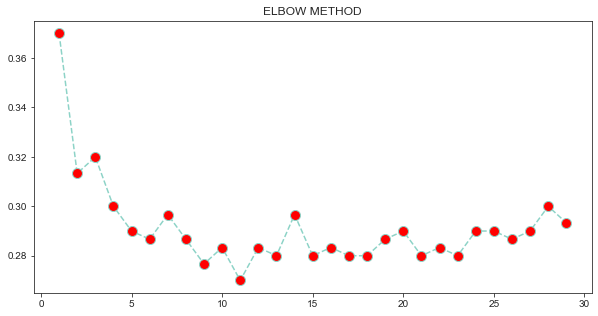

In [231]:
plt.figure(figsize= (10,5))
plt.plot(range(1,30),error_rate, marker = 'o', markerfacecolor ='red', ls = '--', markersize = 10)
plt.title('ELBOW METHOD')

In [232]:
knn = KNeighborsClassifier(n_neighbors= 11)

In [233]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [236]:
predk = knn.predict(X_test)

In [237]:
print(classification_report(predk, y_test))
'/n'
print(confusion_matrix(predk, y_test))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       281
           1       0.14      0.63      0.23        19

    accuracy                           0.73       300
   macro avg       0.55      0.68      0.53       300
weighted avg       0.91      0.73      0.80       300

[[207  74]
 [  7  12]]


In [238]:
dfe = pd.read_csv('dataset_credit_scoring.csv')

In [240]:
dfe.head(1)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2.0,skilled,1,yes,yes,good


In [259]:
dfe['personal_status'].value_counts()

'male single'           545
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: personal_status, dtype: int64

In [270]:
dfe['personal_status'].iloc[:][0][1:5]

'male'